In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
y_data = pd.read_csv('responses.csv')

In [3]:
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


<h2>What is the range between male and female heights?</h2>
We will take a look at our data distribution to see what we are working with. One good way to first explore our data is looking at the gender distribution

In [4]:
f_data = y_data[y_data['Gender'] == 'female']
f_data.shape

(593, 150)

In [5]:
m_data = y_data[y_data['Gender'] == 'male']
m_data.shape

(411, 150)

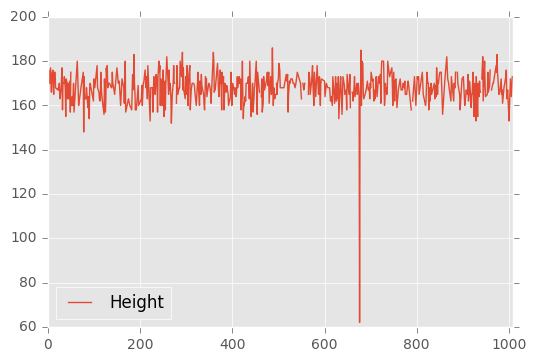

In [6]:
f_data.plot(y = 'Height')
plt.show()

Looks like there is an outlier in the female height data. Looks take a look at this outlier

In [7]:
f_outlier = f_data['Height'].min()
print f_outlier

62.0


It seems that one of the females recorded a 62 cm height.
After some research, we see that the shortest woman living is 62.8cm. While it is possible that this outlier is refering to this person, we do not want one outlier to skew our data and our analyzes.
Hence, we can either:
<ol>
<li>Remove the data</li>
<li>Fix the data</li>
</ol>

We decided assume that the height input is an error, and the actual height is 162, a norm within our female height data. Therefore, we will change the 62 cm to 162 cm

In [8]:
f_data.loc[f_data[f_data['Height'] == f_outlier].index.tolist(),'Height'] = 162.0

C:\Users\Eugene Hong\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


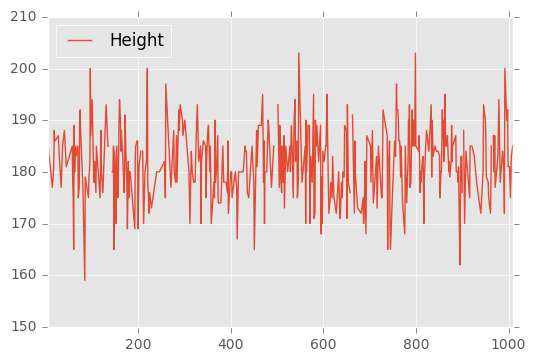

In [9]:
m_data.plot(y = 'Height')
plt.show()

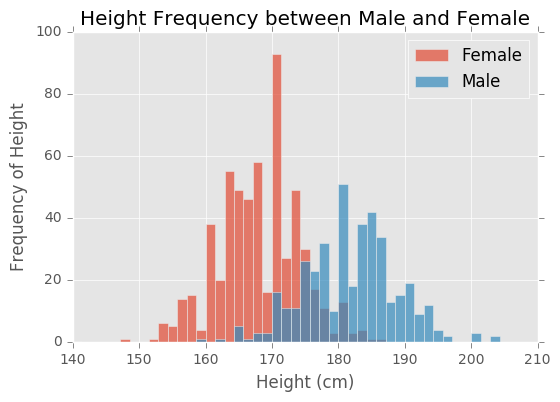

In [10]:
bins = np.linspace(140, 210, 50)

plt.hist(f_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Female')
plt.hist(m_data['Height'].tolist(), bins, range=(bins.min(), bins.max()), alpha = 0.7, label = 'Male')
plt.legend(loc = 'upper right')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency of Height')
plt.title('Height Frequency between Male and Female')
plt.show()

<h2> Relationship between "I live a very healthy lifestyle?" and "smoking habits" and "drinking habits". I will combine these two habits to make  another column </h2>

We want to explore our healthy lifestyle. Lets see smoking, drinking, and our opinion on if that makes us more healthy. Blah blah blah, how this reflects "surveys' blah blah blah. Also put in "I worry about my health"

In [11]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


We are going to convert the smoking and alc responses to numerical values. 0 being 'never' and 5 being 'a lot'

In [12]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

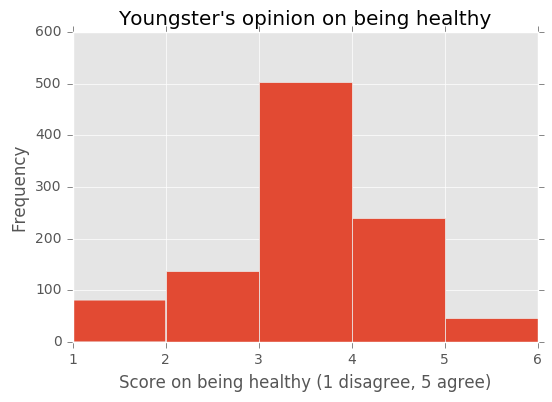

In [13]:
y_data.hist(column='Healthy eating', bins=np.arange(1, 7, 1))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on being healthy')
plt.show()

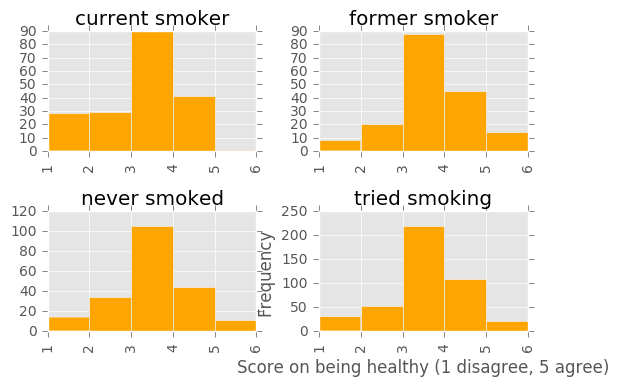

In [14]:
y_data.hist(column='Healthy eating', by='Smoking', color = 'orange', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.show()

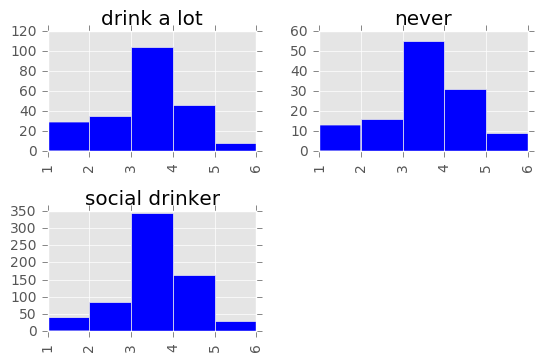

In [15]:
y_data.hist(column='Healthy eating', by='Alcohol', color = 'Blue', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.show()

Convert the smoking and alcohol into numeric, and then put them together

In [16]:
for index, row in y_data.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        y_data.loc[index,'Life health'] = val
    except:
        y_data.loc[index,'Life health'] = np.nan
    

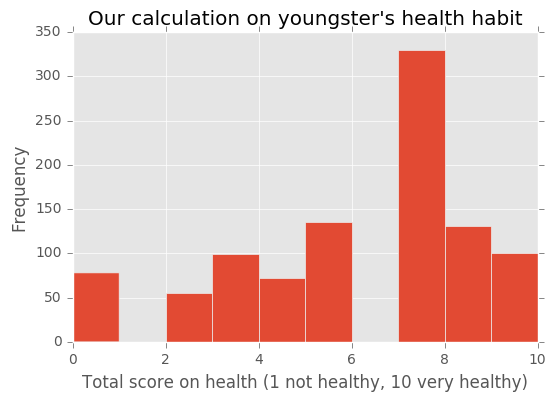

In [17]:
y_data['Life health'].plot.hist(bins = np.linspace(0, 10, 11))
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Frequency')
plt.title('Our calculation on youngster\'s health habit')
plt.show()

In [18]:
t1 = y_data.dropna()

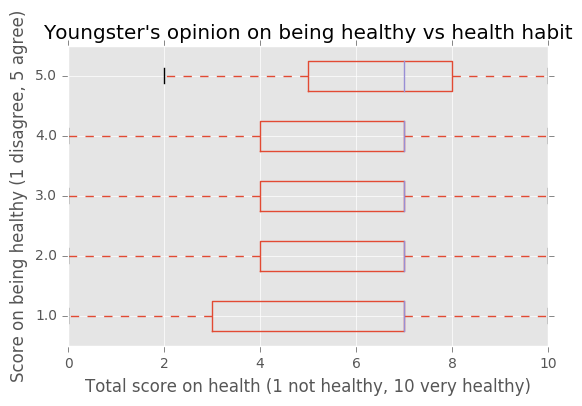

In [19]:
t1.boxplot(column='Life health', by='Healthy eating', vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Score on being healthy (1 disagree, 5 agree)')
plt.title('Youngster\'s opinion on being healthy vs health habit')
plt.suptitle('')
plt.show()

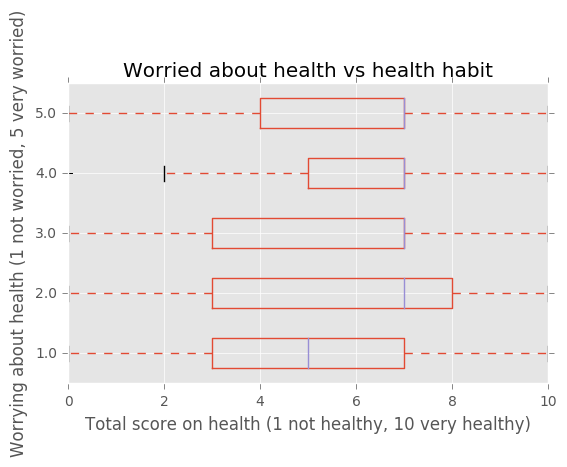

In [20]:
t1.boxplot(column='Life health', by='Health', vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

<h2> !! </h2> It seems that people who are not worried about their health tends to have the worst life style. Denoted by their average health score is much lower at 5.

<h2> Relationship between education, spending, age </h2>

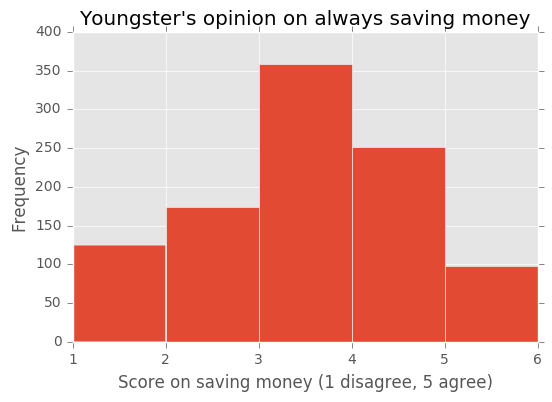

In [21]:
y_data.hist(column='Finances', bins=np.arange(1, 7, 1))
plt.xlabel('Score on saving money (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on always saving money')
plt.show()

In [22]:
t1 = y_data['Education'].value_counts()

In [23]:
t2 = y_data.groupby('Education')

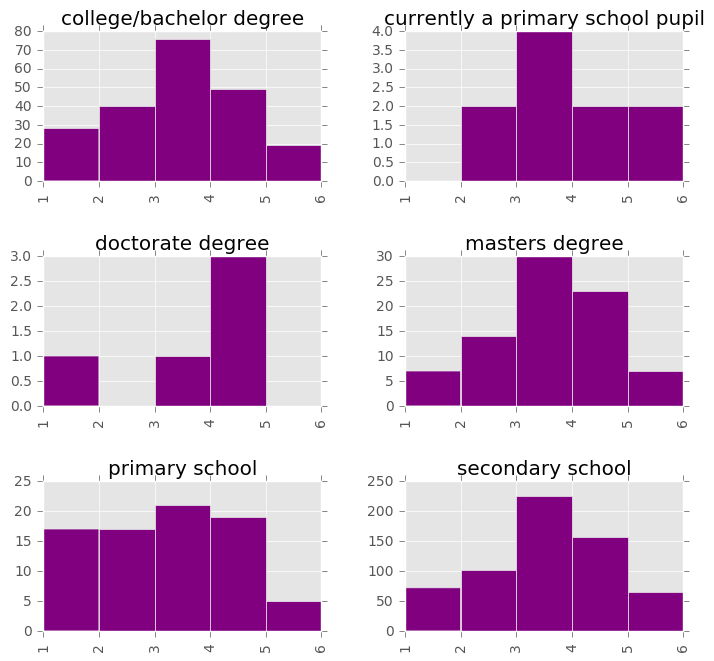

In [24]:
plt.rcParams['figure.figsize'] = (8,8)
y_data.hist(column='Finances', by='Education', color = 'Purple', bins=np.arange(1, 7, 1))
plt.show()

In [25]:
t1 = y_data.groupby('Education')['Finances']
t1.mean()

Education
college/bachelor degree             2.957547
currently a primary school pupil    3.400000
doctorate degree                    3.200000
masters degree                      3.111111
primary school                      2.721519
secondary school                    3.066236
Name: Finances, dtype: float64

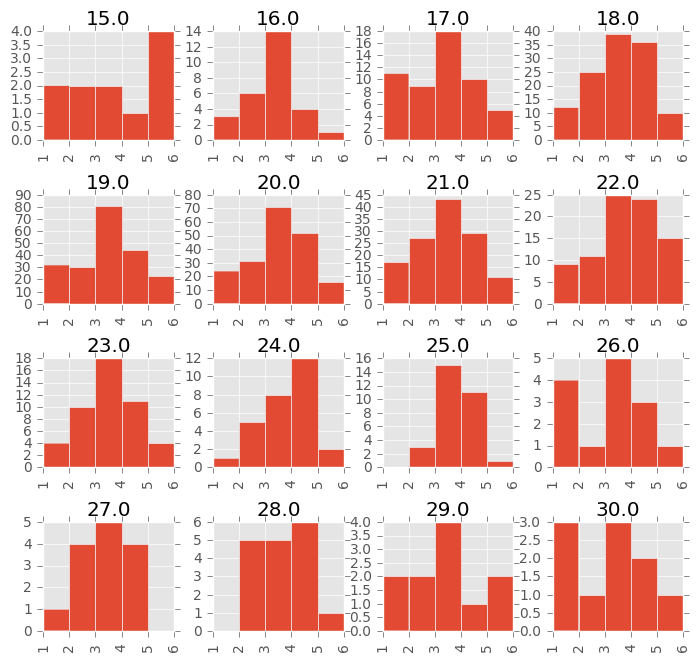

In [26]:
y_data.hist(column='Finances', by = 'Age', bins=np.arange(1, 7, 1))
plt.show()

In [128]:
age_finance = pd.DataFrame(0, index = xrange(15,31) ,columns = xrange(1,6))

In [129]:
for index, row in y_data.iterrows():
    f_num = row['Finances']
    a_num = row['Age']
    if np.isnan(f_num) or np.isnan(a_num):
        continue
    else:
        f_num = int(f_num)
        a_num = int(a_num)
    age_finance.loc[a_num,f_num]+=1

In [130]:
age_finance

,1,2,3,4,5
15,2,2,2,1,4
16,3,6,14,4,1
17,11,9,18,10,5
18,12,25,39,36,10
19,32,30,81,44,23
20,24,31,71,52,16
21,17,27,43,29,11
22,9,11,25,24,15
23,4,10,18,11,4
24,1,5,8,12,2


In [131]:
totals = age_finance.sum(axis = 1)
for x in xrange(15, 15 + len(age_finance)):
    for y in xrange(1,6):
        age_finance.loc[x,y] = float(age_finance.loc[x,y])/totals[x]

In [132]:
age_finance

,1,2,3,4,5
15,0.181818,0.181818,0.181818,0.090909,0.363636
16,0.107143,0.214286,0.500000,0.142857,0.035714
17,0.207547,0.169811,0.339623,0.188679,0.094340
18,0.098361,0.204918,0.319672,0.295082,0.081967
19,0.152381,0.142857,0.385714,0.209524,0.109524
20,0.123711,0.159794,0.365979,0.268041,0.082474
21,0.133858,0.212598,0.338583,0.228346,0.086614
22,0.107143,0.130952,0.297619,0.285714,0.178571
23,0.085106,0.212766,0.382979,0.234043,0.085106
24,0.035714,0.178571,0.285714,0.428571,0.071429


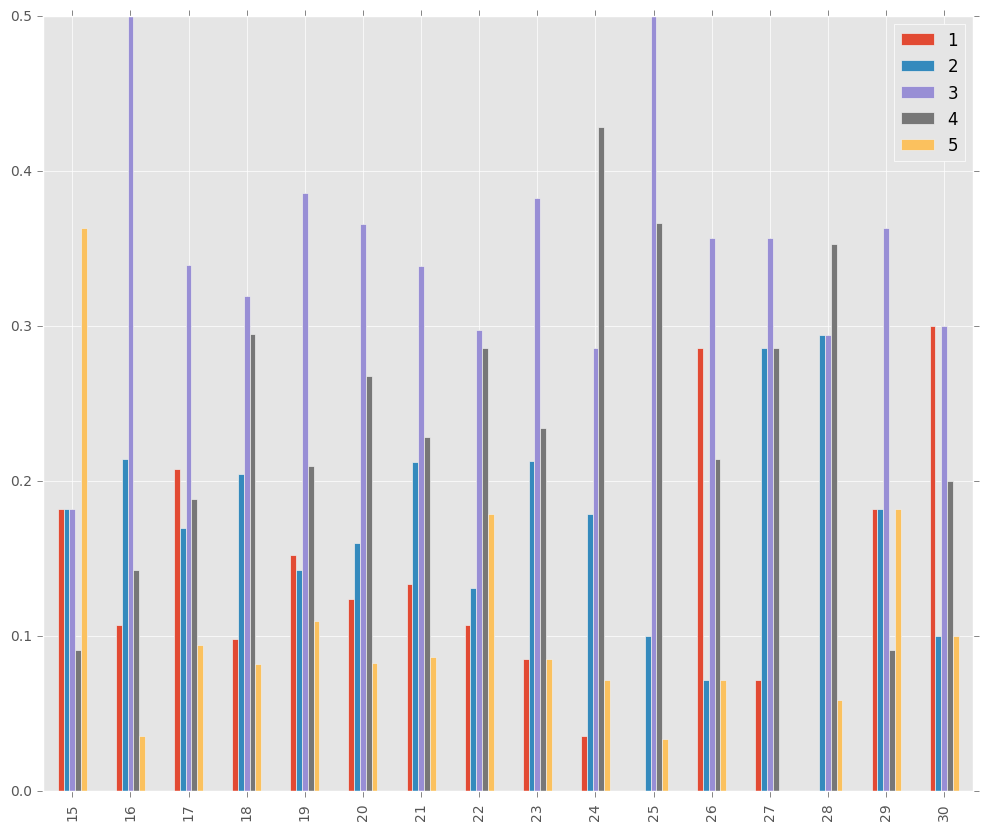

In [133]:
age_finance.plot(kind='bar', figsize = (12,10))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Youngster\'s opinion on always saving money by age')
plt.show()

<h3> Hard to look at Age vs Finances. Scatter plot looks bad too. </h3>

Lets look at the spending between entertainment, looks, gadgets, and healthy eating. First, a side by side bar plot, then individual plots

In [29]:
spendings = y_data.keys()[136:140]
print spendings

Index([u'Entertainment spending', u'Spending on looks', u'Spending on gadgets',
       u'Spending on healthy eating'],
      dtype='object')


In [30]:
df_spend = pd.DataFrame()
for x in spendings:
    nums = y_data[x].value_counts()
    df_nums = nums.to_frame()
    if df_spend.empty:
        df_spend = nums.to_frame()
    else:
        df_spend = pd.merge(df_spend, df_nums, right_index = True, left_index = True)
    

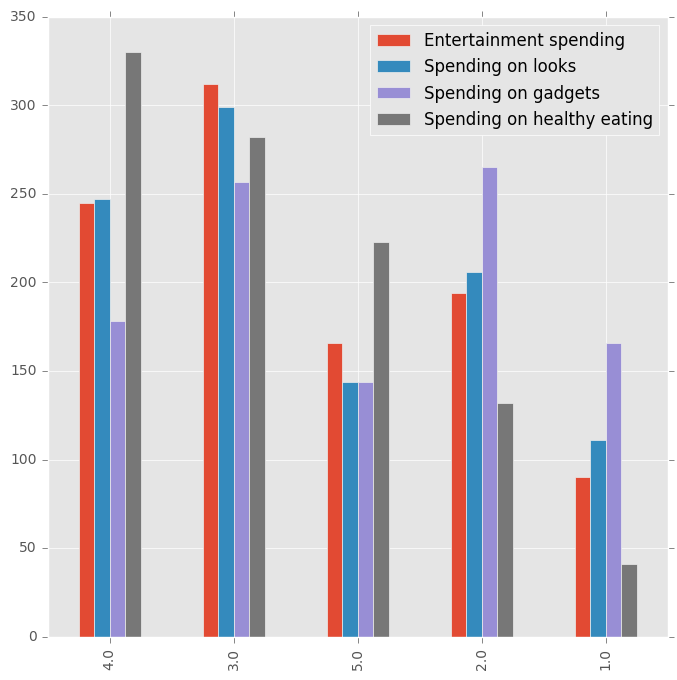

In [31]:
df_spend.plot(kind='bar')
plt.show()

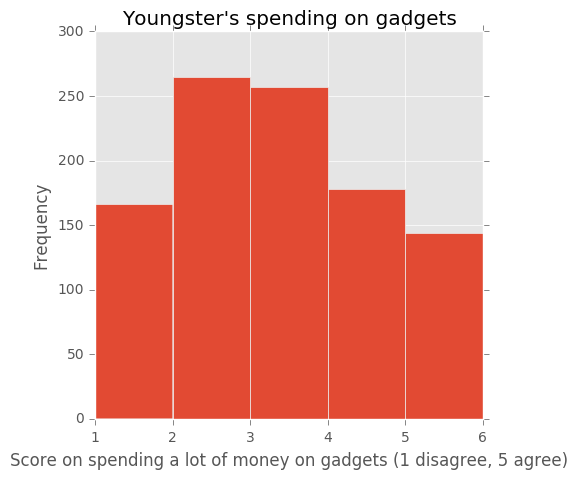

In [32]:
y_data.hist(column='Spending on gadgets', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on gadgets (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on gadgets')
plt.show()

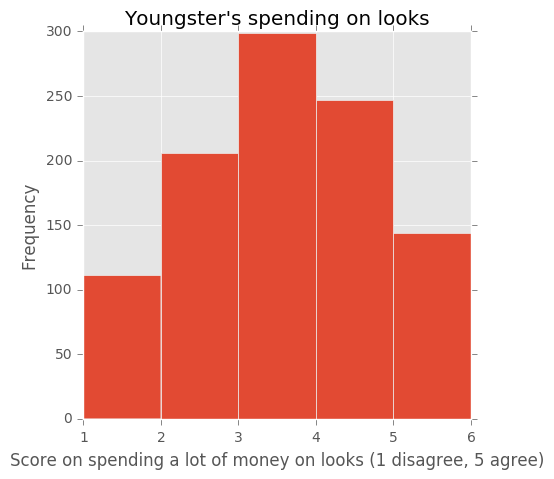

In [33]:
y_data.hist(column='Spending on looks', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on looks (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on looks')
plt.show()

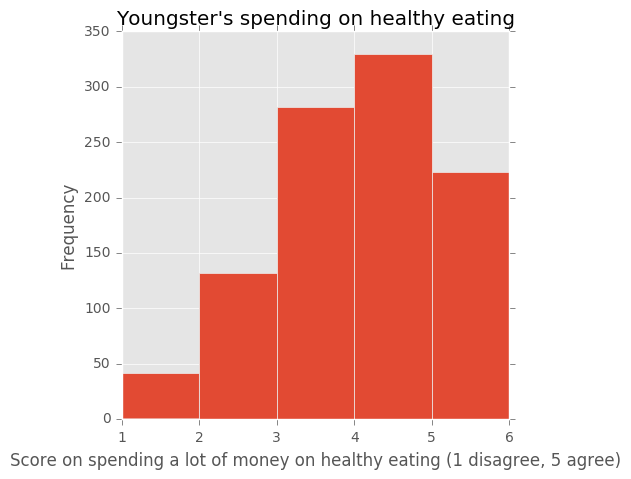

In [34]:
y_data.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on healthy eating')
plt.show()

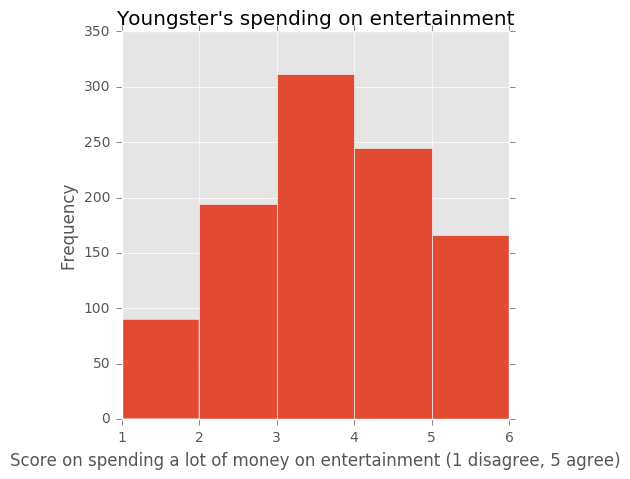

In [35]:
y_data.hist(column='Entertainment spending', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on entertainment (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on entertainment')
plt.show()